In [8]:
import numpy as np
import matplotlib.pyplot as plt

(a) Implement a simulation experiment of the minimization of f(x) = $x^2$
. Suppose
the particle starts with initial velocity, v = 10, pointing away from the optimum,
and with initial position x = 20. As in the previous exercsie, for the sake of
simplicity, we keep r1 and r2 constant during the optimization process. Consider
the following two settings: (1) ω = 0.5, α1 = α2 = 1.5, r1 = r2 = 0.5; (2)
ω = 0.7, α1 = α2 = 1.5, r1 = r2 = 1.


In [9]:
def calc_fitness(candidate):
    return np.square(candidate)

In [10]:
def update_velocity(vel, local_best, global_best, current, omega, alpha1, alpha2, r1, r2):
    return omega*vel + alpha1*r1*(local_best - current) + alpha2*r2*(global_best - current)

def update_position(current, velocity):
    new_pos = current + velocity
    return new_pos


In [18]:
def run_PSO(p, v, omega, alpha1, alpha2, r1, r2):
    gen = 0
    local_best = global_best =  p
    # Keep track for statistics
    positions = [p]
    while not calc_fitness(p) == 0 and gen <= 100:
        if gen % 20 == 0:
            print(f"current generation: {gen} -- current fitness: {calc_fitness(p)} -- current position: {p}")
        v = update_velocity(v, local_best, global_best, p, omega, alpha1, alpha2, r1, r2)
        p = update_position(p, v)
        local_best = p if calc_fitness(p) < calc_fitness(local_best) else local_best
        global_best = local_best
        positions.append(p)
        gen += 1
    return positions

current generation: 0 -- current fitness: 400 -- current position: 20
current generation: 20 -- current fitness: 225.00057220495364 -- current position: 15.000019073486328
current generation: 40 -- current fitness: 225.0000000005457 -- current position: 15.00000000001819
current generation: 60 -- current fitness: 225.0 -- current position: 15.0
current generation: 80 -- current fitness: 225.0 -- current position: 15.0
current generation: 100 -- current fitness: 225.0 -- current position: 15.0


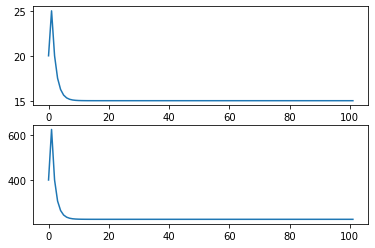

In [19]:
# Define initial values
p = 20
v = 10
# Define Hyperparameters
omega = 0.5
r1 = r2 = 0.5
alpha1 = alpha2 = 1.5

positions = run_PSO(p, v , omega, alpha1, alpha2, r1, r2)
fig, axs = plt.subplots(2)
axs[0].plot(np.arange(len(positions)), positions)
axs[1].plot(np.arange(len(positions)), [calc_fitness(p) for p in positions])


current generation: 0 -- current fitness: 400 -- current position: 20
current generation: 20 -- current fitness: 0.687000618302583 -- current position: 0.8288550043901424
current generation: 40 -- current fitness: 0.000846766629541989 -- current position: -0.02909925479358516
current generation: 60 -- current fitness: 5.468678739084855e-06 -- current position: -0.0023385206304595337
current generation: 80 -- current fitness: 1.3936985756976321e-08 -- current position: 0.00011805501157077713
current generation: 100 -- current fitness: 9.536151238251582e-11 -- current position: 9.765321929281995e-06


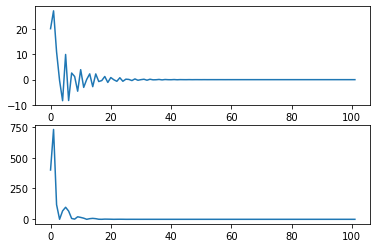

In [20]:
# Define initial values
p = 20
v = 10
# Define Hyperparameters
omega = 0.7
r1 = r2 = 1
alpha1 = alpha2 = 1.5

positions = run_PSO(p, v , omega, alpha1, alpha2, r1, r2)
fig, axs = plt.subplots(2)
axs[0].plot(np.arange(len(positions)), positions)
axs[1].plot(np.arange(len(positions)), [calc_fitness(p) for p in positions])

(c) Discuss how would a particle ”swarm” consisting of a single member perform
in such a minimization task when ω < 1, assuming the particle starts with the
velocity pointing away from the optimum.

[TODO]